In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'C:\Users\stale\DS Portfolio Projects\Video Game Sales Analysis/vgsales.csv')

In [3]:
print(df.head())

   Rank                      Name Platform    Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006.0        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985.0      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008.0        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009.0        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [4]:
print(df.dtypes)

Rank              int64
Name             object
Platform         object
Year            float64
Genre            object
Publisher        object
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object


In [5]:
# Replace NaN values with the median year
df['Year'] = df['Year'].fillna(df['Year'].median()).astype(int)

df['Year'] = df['Year'].astype(int) #Converting the Year into Integers

In [6]:
print(df.head())

   Rank                      Name Platform  Year         Genre Publisher  \
0     1                Wii Sports      Wii  2006        Sports  Nintendo   
1     2         Super Mario Bros.      NES  1985      Platform  Nintendo   
2     3            Mario Kart Wii      Wii  2008        Racing  Nintendo   
3     4         Wii Sports Resort      Wii  2009        Sports  Nintendo   
4     5  Pokemon Red/Pokemon Blue       GB  1996  Role-Playing  Nintendo   

   NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0     41.49     29.02      3.77         8.46         82.74  
1     29.08      3.58      6.81         0.77         40.24  
2     15.85     12.88      3.79         3.31         35.82  
3     15.75     11.01      3.28         2.96         33.00  
4     11.27      8.89     10.22         1.00         31.37  


In [7]:
df.isnull().sum() #Checking for null values

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64

In [8]:
df['Publisher'] = df['Publisher'].fillna('Unknown') #Filling 'Publisher' null values with 'Unknown'

In [9]:
df.isnull().sum() #No more null values, yay! :) 

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
print(df.duplicated().sum) #Checking for duplicates

<bound method Series.sum of 0        False
1        False
2        False
3        False
4        False
         ...  
16593    False
16594    False
16595    False
16596    False
16597    False
Length: 16598, dtype: bool>


In [11]:
#Top perforoming genres and platforms globally

genre_sales = df.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

print(genre_sales, platform_sales)

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64 Platform
PS2     1255.64
X360     979.96
PS3      957.84
Wii      926.71
DS       822.49
PS       730.66
GBA      318.50
PSP      296.28
PS4      278.10
PC       258.82
XB       258.26
GB       255.45
NES      251.07
3DS      247.46
N64      218.88
SNES     200.05
GC       199.36
XOne     141.06
2600      97.08
WiiU      81.86
PSV       61.93
SAT       33.59
GEN       28.36
DC        15.97
SCD        1.87
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: Global_Sales, dtype: float64


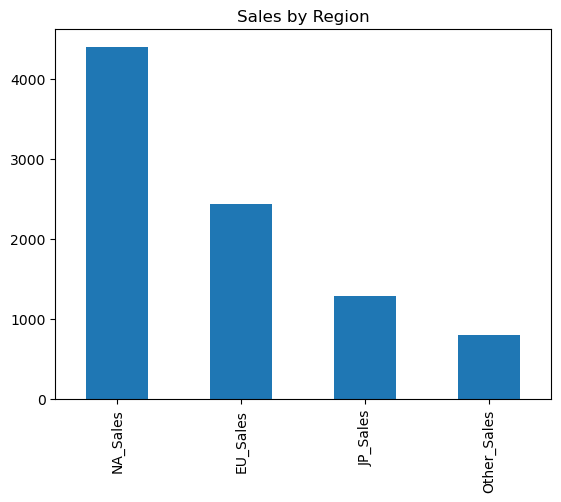

In [12]:
#Sales distribution by Region

regional_sales = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

regional_sales.plot(kind='bar', title='Sales by Region')

plt.show()

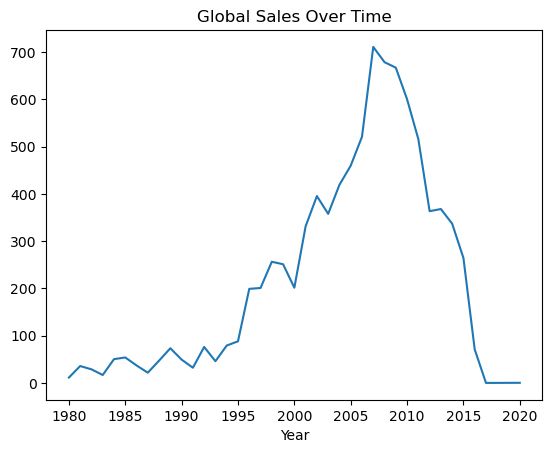

In [13]:
#Sales by Year Analysis 

sales_by_year = df.groupby('Year')['Global_Sales'].sum()
sales_by_year.plot(kind='line', title='Global Sales Over Time')

plt.show()

In [14]:
#Top 10 Publishers 

top_publishers = df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

print(top_publishers)

Publisher
Nintendo                        1786.56
Electronic Arts                 1110.32
Activision                       727.46
Sony Computer Entertainment      607.50
Ubisoft                          474.72
Take-Two Interactive             399.54
THQ                              340.77
Konami Digital Entertainment     283.64
Sega                             272.99
Namco Bandai Games               254.09
Name: Global_Sales, dtype: float64


In [15]:
# Most Popular Generes in Different Regions

genre_by_region = df.groupby(['Genre'])[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].sum()

print(genre_by_region)

              NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                  
Action          877.83    525.00    159.95       187.38
Adventure       105.80     64.13     52.07        16.81
Fighting        223.59    101.32     87.35        36.68
Misc            410.24    215.98    107.76        75.32
Platform        447.05    201.63    130.77        51.59
Puzzle          123.78     50.78     57.31        12.55
Racing          359.42    238.39     56.69        77.27
Role-Playing    327.28    188.06    352.31        59.61
Shooter         582.60    313.27     38.28       102.69
Simulation      183.31    113.38     63.70        31.52
Sports          683.35    376.85    135.37       134.97
Strategy         68.70     45.34     49.46        11.36


In [16]:
genre_by_region.shape

(12, 4)

In [17]:
from matplotlib_inline.backend_inline import set_matplotlib_formats

# Set higher resolution for inline plots
set_matplotlib_formats('retina')

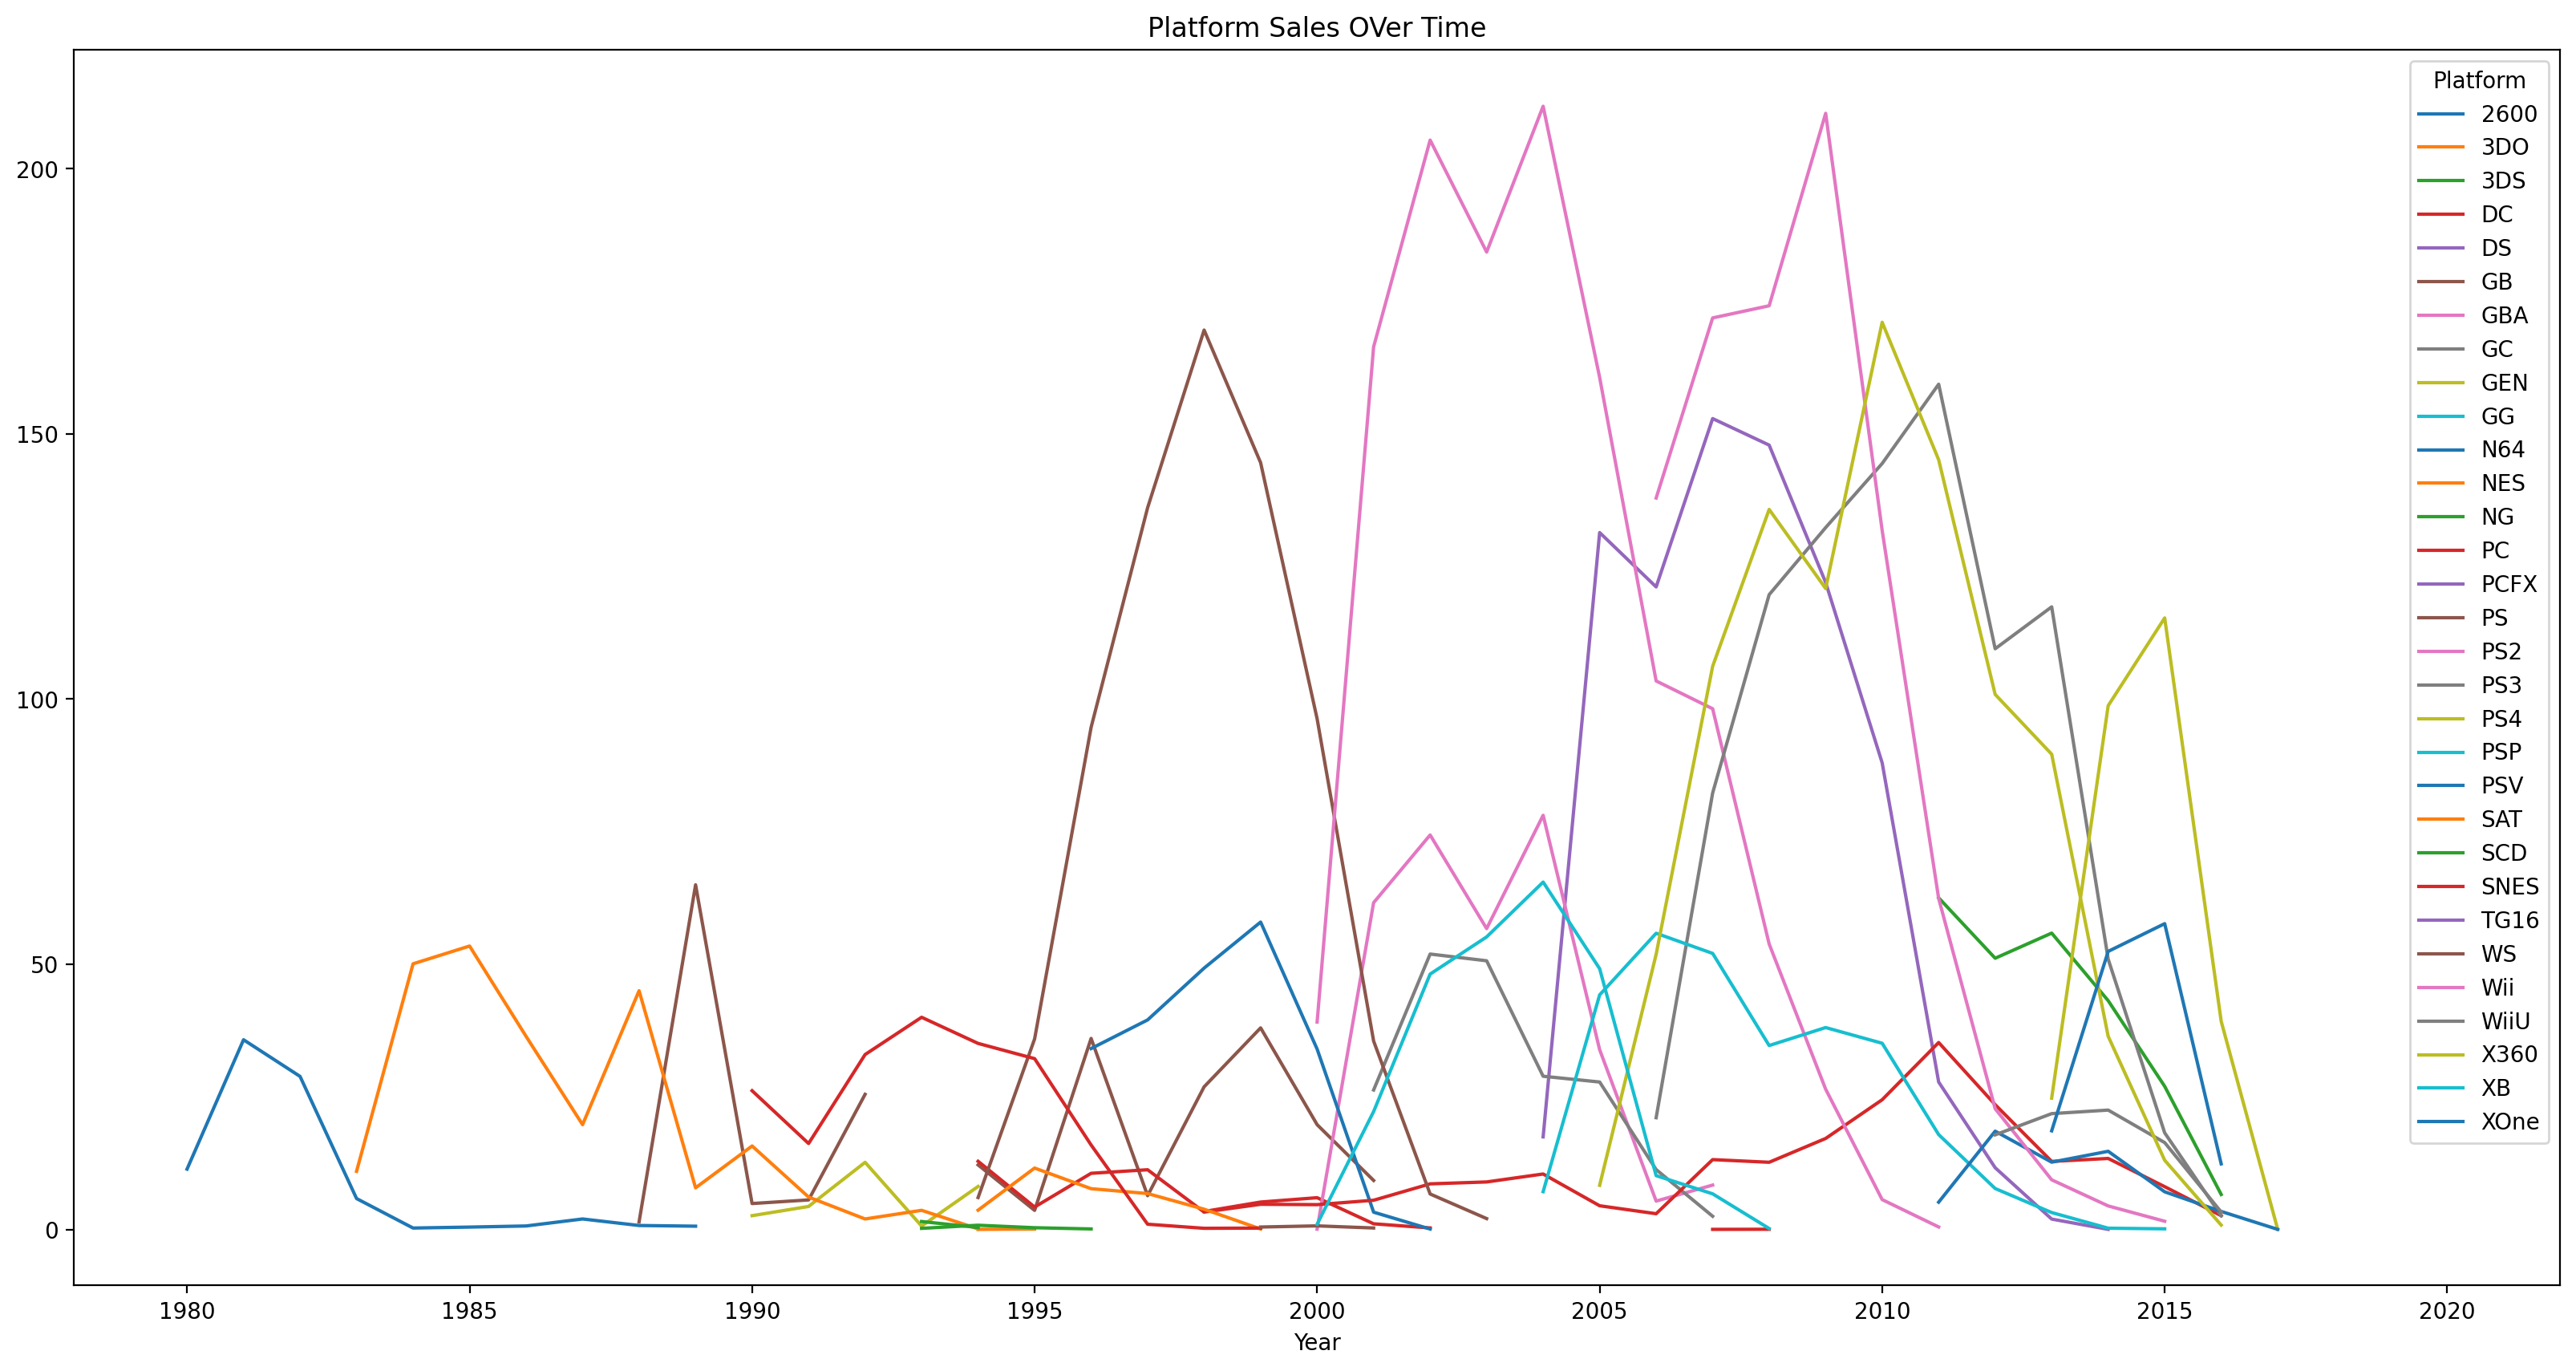

In [18]:
# Analysizing Platform Sales Overtime


platform_sales_by_year = df.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack()
platform_sales_by_year.plot(kind='line', title='Platform Sales OVer Time', figsize=(20,10))

plt.show()

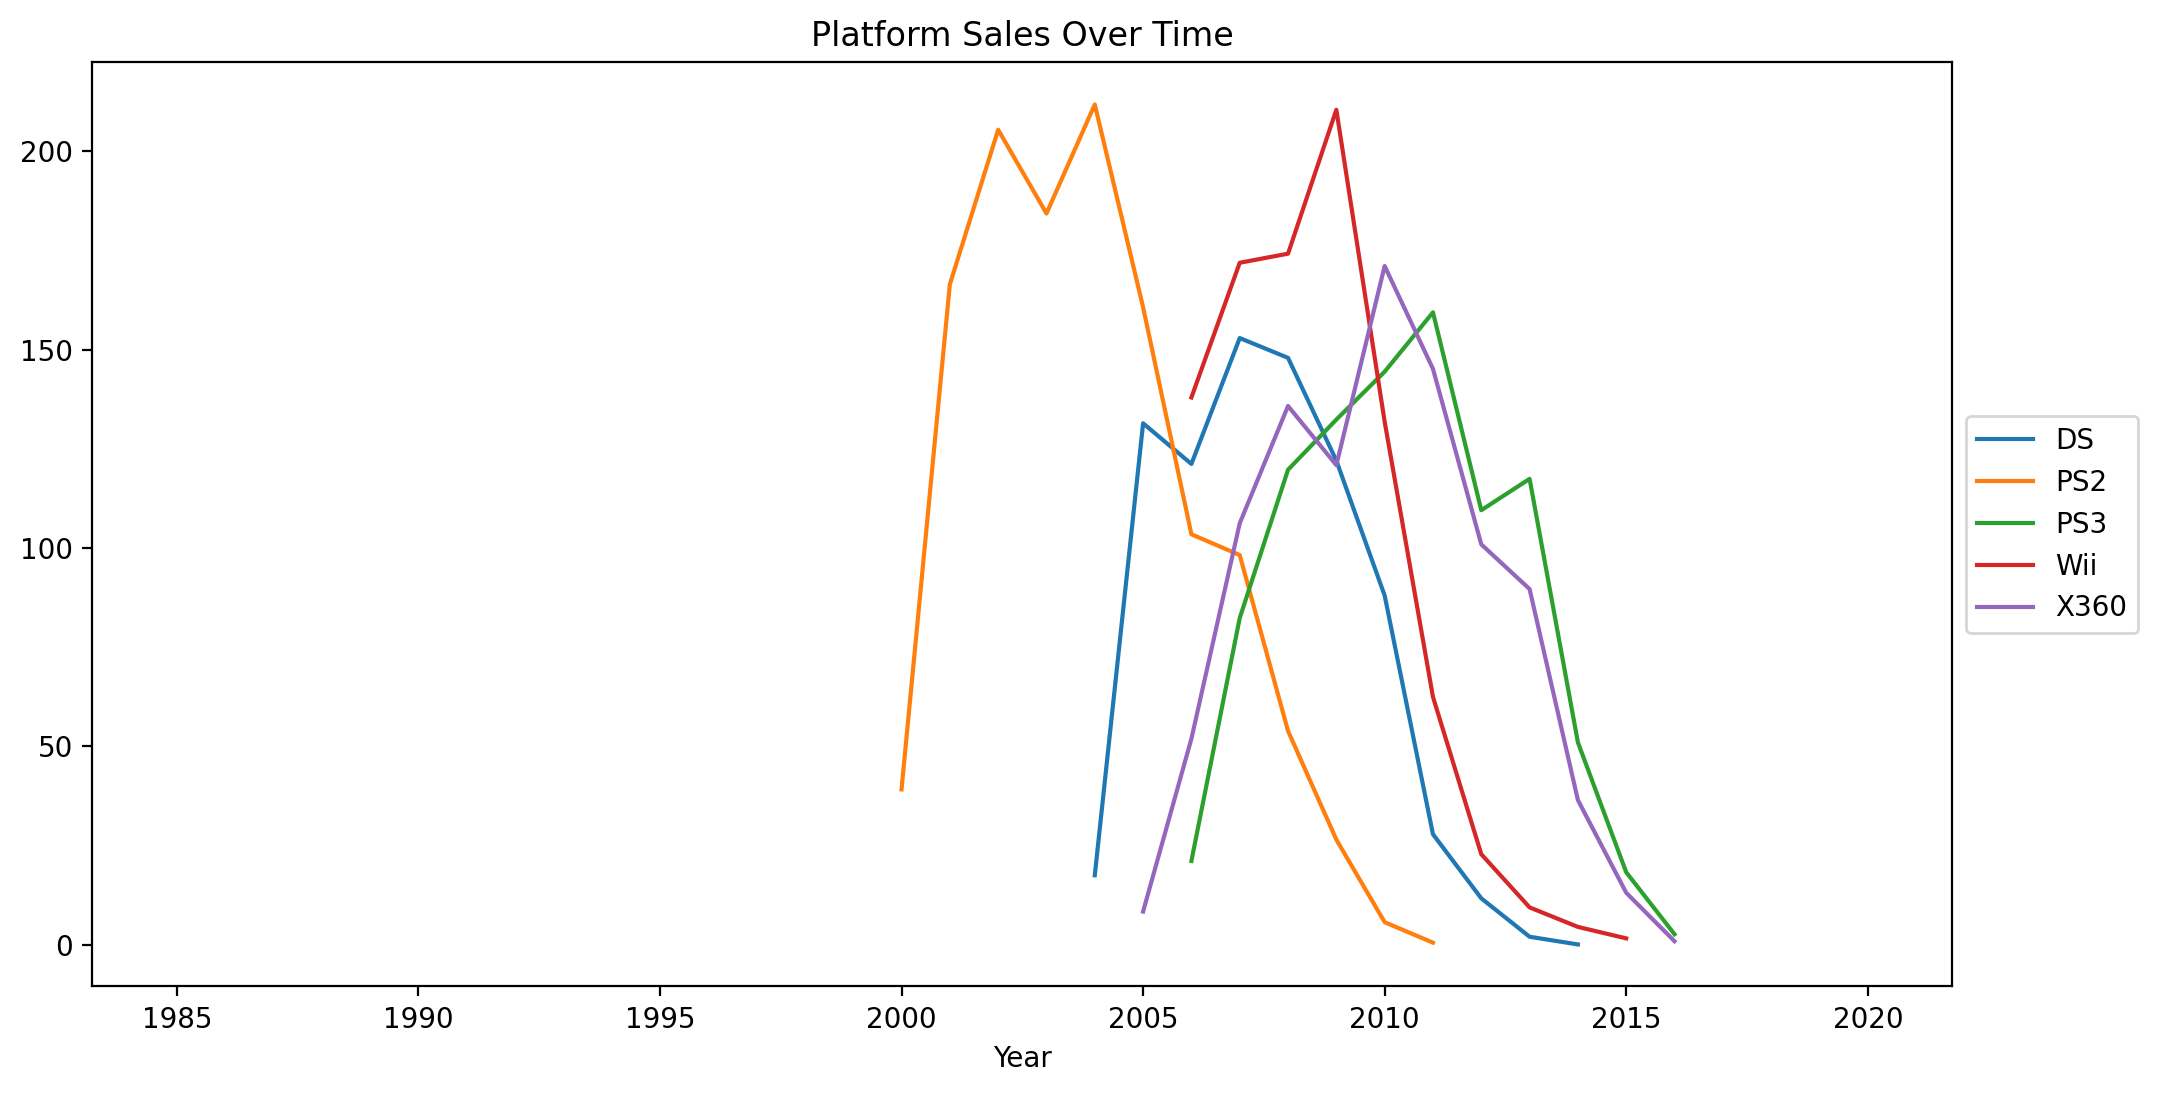

In [19]:
# Select top platforms by total sales
top_platforms = df.groupby('Platform')['Global_Sales'].sum().nlargest(5).index
filtered_data = df[df['Platform'].isin(top_platforms)]

#Re-plot with limited platforms
platform_sales_by_year = filtered_data.groupby(['Year', 'Platform'])['Global_Sales'].sum().unstack()
platform_sales_by_year.plot(kind='line', title='Platform Sales Over Time', figsize=(12, 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [20]:
# Predictive Modeling

In [21]:
 #Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

x=df[['Name', 'Platform', 'Genre']]
y=df['Global_Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [22]:
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Optional: Display the first few rows of each dataset
print("\nx_train sample:\n", x_train.head())
print("\ny_train sample:\n", y_train.head())

x_train shape: (13278, 3)
x_test shape: (3320, 3)
y_train shape: (13278,)
y_test shape: (3320,)

x_train sample:
                                        Name Platform         Genre
14303          Stacked with Daniel Negreanu      PSP          Misc
13455  National Geographic Panda (US sales)       DS    Simulation
6724         Yakuza Zero: The Place of Oath      PS3        Action
898                  The Sims: Makin' Magic       PC    Simulation
8484         Lufia: Curse of the Sinistrals       DS  Role-Playing

y_train sample:
 14303    0.03
13455    0.04
6724     0.25
898      1.92
8484     0.16
Name: Global_Sales, dtype: float64
